Необходимо построить классификатор, разделяющий изображения из датасета: крокодил или часы. Указать полученную точность на тестовом и обучающем множестве.

Решение задачи основано на этом [тьюториале](https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html).

In [1]:
from __future__ import print_function, division
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import shutil
import numpy as np
plt.ion() 

Распакуем данные из архива, разделим их на тренировочное и валидационное множества в пропорции 75%/25%:

In [2]:
! unrar x clocks_crocodiles.rar 


UNRAR 5.60 beta 3 freeware      Copyright (c) 1993-2018 Alexander Roshal


Extracting from clocks_crocodiles.rar

Creating    clock                                                     OK
Extracting  clock/20525.png                                                0%  OK 
Extracting  clock/5725.png                                                 0%  OK 
Extracting  clock/32438.png                                                0%  OK 
Extracting  clock/49498.png                                                0%  OK 
Extracting  clock/31053.png                                                0%  OK 
Extracting  clock/3110.png                                                 0%  OK 
Extracting  clock/5088.png                                                 0%  OK 
Extracting  clock/39621.png                                                0%  OK 
Extracting  clock/44557.png                                              

Extracting  clock/35337.png                                               10%  OK 
Extracting  clock/13573.png                                               10%  OK 
Extracting  clock/36122.png                                               10%  OK 
Extracting  clock/36204.png                                               10%  OK 
Extracting  clock/42949.png                                               10%  OK 
Extracting  clock/8436.png                                                10%  OK 
Extracting  clock/49069.png                                               11%  OK 
Extracting  clock/37858.png                                               11%  OK 
Extracting  clock/41161.png                                               11%  OK 
Extracting  clock/2053.png                                                11%  OK 
Extracting  clock/36224.png                                               11

Extracting  clock/25693.png                                               24%  OK 
Extracting  clock/12670.png                                               24%  OK 
Extracting  clock/4824.png                                                24%  OK 
Extracting  clock/19462.png                                               24%  OK 
Extracting  clock/29021.png                                               24%  OK 
Extracting  clock/11429.png                                               24%  OK 
Extracting  clock/8117.png                                                24%  OK 
Extracting  clock/13209.png                                               24%  OK 
Extracting  clock/17083.png                                               24%  OK 
Extracting  clock/28244.png                                               25%  OK 
Extracting  clock/40909.png                                               25

Extracting  clock/36979.png                                               37%  OK 
Extracting  clock/3530.png                                                37%  OK 
Extracting  clock/21578.png                                               37%  OK 
Extracting  clock/10976.png                                               37%  OK 
Extracting  clock/46915.png                                               37%  OK 
Extracting  clock/9104.png                                                37%  OK 
Extracting  clock/10656.png                                               37%  OK 
Extracting  clock/28109.png                                               38%  OK 
Extracting  clock/9221.png                                                38%  OK 
Extracting  clock/31931.png                                               38%  OK 
Extracting  clock/49821.png                                               38

Extracting  crocodile/13966.png                                           50%  OK 
Extracting  crocodile/42673.png                                           51%  OK 
Extracting  crocodile/45870.png                                           51%  OK 
Extracting  crocodile/10865.png                                           51%  OK 
Extracting  crocodile/5599.png                                            51%  OK 
Extracting  crocodile/13610.png                                           51%  OK 
Extracting  crocodile/35737.png                                           51%  OK 
Extracting  crocodile/48181.png                                           51%  OK 
Extracting  crocodile/46334.png                                           51%  OK 
Extracting  crocodile/39265.png                                           51%  OK 
Extracting  crocodile/11184.png                                           51

Extracting  crocodile/25194.png                                           63%  OK 
Extracting  crocodile/20952.png                                           63%  OK 
Extracting  crocodile/48733.png                                           63%  OK 
Extracting  crocodile/36963.png                                           64%  OK 
Extracting  crocodile/9467.png                                            64%  OK 
Extracting  crocodile/7769.png                                            64%  OK 
Extracting  crocodile/12197.png                                           64%  OK 
Extracting  crocodile/5253.png                                            64%  OK 
Extracting  crocodile/13955.png                                           64%  OK 
Extracting  crocodile/1388.png                                            64%  OK 
Extracting  crocodile/19172.png                                           64

Extracting  crocodile/47249.png                                           77%  OK 
Extracting  crocodile/15469.png                                           77%  OK 
Extracting  crocodile/16743.png                                           77%  OK 
Extracting  crocodile/27286.png                                           77%  OK 
Extracting  crocodile/40077.png                                           77%  OK 
Extracting  crocodile/36965.png                                           77%  OK 
Extracting  crocodile/10626.png                                           77%  OK 
Extracting  crocodile/38146.png                                           78%  OK 
Extracting  crocodile/49381.png                                           78%  OK 
Extracting  crocodile/20314.png                                           78%  OK 
Extracting  crocodile/40097.png                                           78

Extracting  crocodile/16125.png                                           93%  OK 
Extracting  crocodile/5770.png                                            93%  OK 
Extracting  crocodile/35398.png                                           93%  OK 
Extracting  crocodile/17698.png                                           94%  OK 
Extracting  crocodile/30800.png                                           94%  OK 
Extracting  crocodile/25590.png                                           94%  OK 
Extracting  crocodile/38941.png                                           94%  OK 
Extracting  crocodile/23132.png                                           94%  OK 
Extracting  crocodile/29979.png                                           94%  OK 
Extracting  crocodile/40767.png                                           94%  OK 
Extracting  crocodile/16191.png                                           94

In [3]:
# Создадим соответствующие директории
! mkdir train
! mkdir val
! mkdir train/crocodile
! mkdir val/crocodile
! mkdir train/clock
! mkdir val/clock

In [5]:
# Разделим крокодилов на трейн и валидацию
source = "crocodile"
dest1 = "train/crocodile"
dest2 = "val/crocodile"
files = os.listdir(source)

for f in files:
    if np.random.rand(1) > 0.25:
        shutil.move(source + '/'+ f, dest1 + '/'+ f)
    else:
        shutil.move(source + '/'+ f, dest2 + '/'+ f)

In [6]:
# И часы тоже
source = "clock"
dest1 = "train/clock"
dest2 = "val/clock"
files = os.listdir(source)

for f in files:
    if np.random.rand(1) > 0.25:
        shutil.move(source + '/'+ f, dest1 + '/'+ f)
    else:
        shutil.move(source + '/'+ f, dest2 + '/'+ f)

In [7]:
# Удалим лишние директории, которые теперь пусты
! rm -r clock
! rm -r crocodile

Вместо того, чтобы обучать картиночную сеть с нуля, принято брать предтренированные сети на очень больших наборах данных (например, на 
ImageNet, который содержит 1,2 миллиона изображений с 1000 категориями), а затем использовать fine-tuning для адаптации сети к имеющейся задаче.

In [26]:
# Определим аугментации и нормализацию данных для обучения 
# и только нормализацию для валидации

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Создадим итераторы по обоим датасетам
data_dir = '.'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

# Используем cuda, если есть возможность (нет :))
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

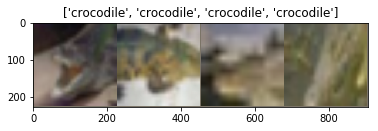

In [27]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  


# Итерирование по батчам
inputs, classes = next(iter(dataloaders['train']))

# Покажем один батч из трейна
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [28]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train()  
            else:
                model.eval()   

            running_loss = 0.0
            running_corrects = 0

            # Итерации по данным
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                # forward
                # Если идет обучение - следим за историей
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward 
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Подсчет ошибки
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            
            # Ошибка и точность на текущей эпохе
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # Загружаем веса лучшей модели
    model.load_state_dict(best_model_wts)
    return model


In [29]:
# Визуализируем результаты модели
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot()
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

У нас очень мало изображений, поэтому для такой задачи нужно использовать заранее предобученную сеть, чтобы добиться приемлемого качества классификации. Обучим известную модель [ResNet-18](https://www.kaggle.com/pytorch/resnet18). Эта модель, предложенная Microsoft Research в 2015 году, имеет identity blocks, которые предсказывают разницу между результатом предыдущего слоя и таргетом, что помогает обучать более глубокие сети, избегая проблему затухающих градиентов.

In [30]:
# Загрузим предобученную сеть и выкинем последний полносвязный слой
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Понижаем LR в 0.1 раз каждые 7 эпох
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [32]:
# Запуск обучения
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=25)

Epoch 0/24
----------
train Loss: 0.5255 Acc: 0.7881
val Loss: 0.1786 Acc: 0.9347

Epoch 1/24
----------
train Loss: 0.5507 Acc: 0.7854
val Loss: 0.1138 Acc: 0.9673

Epoch 2/24
----------
train Loss: 0.5126 Acc: 0.7881
val Loss: 0.0772 Acc: 0.9796

Epoch 3/24
----------
train Loss: 0.4617 Acc: 0.8079
val Loss: 0.0690 Acc: 0.9755

Epoch 4/24
----------
train Loss: 0.5953 Acc: 0.7788
val Loss: 0.1230 Acc: 0.9551

Epoch 5/24
----------
train Loss: 0.4271 Acc: 0.8265
val Loss: 0.1314 Acc: 0.9469

Epoch 6/24
----------
train Loss: 0.4040 Acc: 0.8358
val Loss: 0.0579 Acc: 0.9878

Epoch 7/24
----------
train Loss: 0.3022 Acc: 0.8742
val Loss: 0.0660 Acc: 0.9755

Epoch 8/24
----------
train Loss: 0.3184 Acc: 0.8570
val Loss: 0.0663 Acc: 0.9796

Epoch 9/24
----------
train Loss: 0.3356 Acc: 0.8517
val Loss: 0.0646 Acc: 0.9796

Epoch 10/24
----------
train Loss: 0.3265 Acc: 0.8675
val Loss: 0.0645 Acc: 0.9837

Epoch 11/24
----------
train Loss: 0.2855 Acc: 0.8808
val Loss: 0.0550 Acc: 0.9878

Ep

Лучшая точность на валидации - 0.98, на тренировочном множестве 0.91. Точность на тренировочном множестве получилась ниже из-за того, что у нас очень мало данных (всего 1000 изображений в обоих множествах, что очень мало для нейросетей).

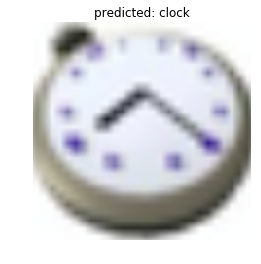

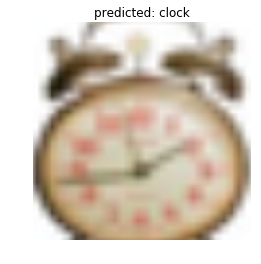

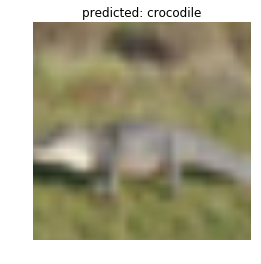

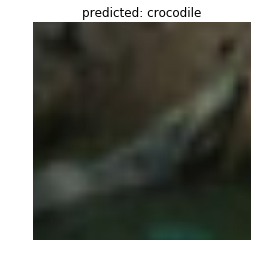

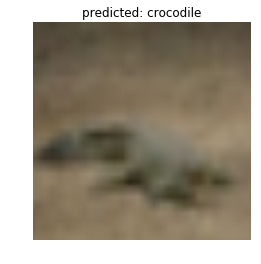

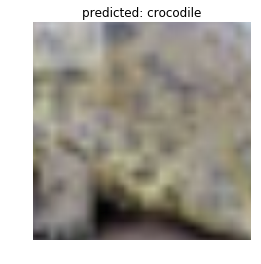

In [33]:
# Визуализируем результат
visualize_model(model_ft)

Покажем примеры, в лейблах которых сеть наименее уверена, то есть вероятность принадлежности к классу ближе всего к 0.5 среди всех изображений текущего батча. Здесь мы выводим 4 изображения из валидационного множества, таких, что вероятность их принадлежности к классу меньше 0.6.

In [58]:
softmax = nn.Softmax(dim=1)

def visualize_uncertain(model, num_images=4):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)
                
            outputs = model(inputs)
            # Посчитаем вероятности принадлежности к классу
            proba, preds = torch.max(softmax(outputs), 1)
            # Выберем минимальную вероятность в батче
            uncertain_prob = round(float(min(proba)), 4)
            
            # Если вероятность близка к 0.5 - сеть более неуверена в метке, выведем такие изображения
            if uncertain_prob < .6:
                
                # Получим индекс изображения с наименьшей вероятностью
                uncertain_idx = np.argmin(proba)
                images_so_far += 1
                ax = plt.subplot()
                ax.axis('off')
                ax.set_title('predicted: {}, probability: {}'.format(class_names[preds[uncertain_idx]], uncertain_prob))
                imshow(inputs.cpu().data[uncertain_idx]) # not sure if
            
            if images_so_far == num_images:
                model.train(mode=was_training)
                return

        model.train(mode=was_training)

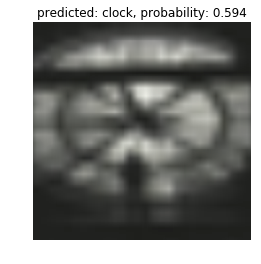

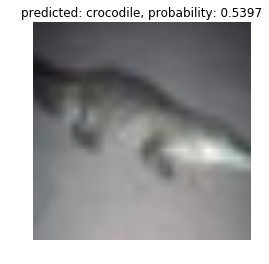

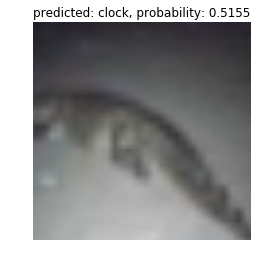

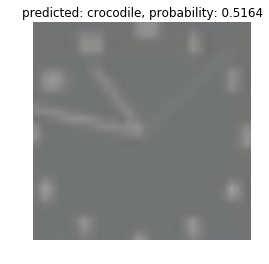

In [59]:
visualize_uncertain(model_ft)